In [101]:
import pandas as pd

df = pd.read_csv('Province.csv')

print(df.columns)

Index(['Region', 'Region code', 'Province', 'Province code',
       'Annual Per Capita Poverty Threshold \n(in PhP)  2015u ',
       'Annual Per Capita Poverty Threshold \n(in PhP)  2018u ',
       'Poverty Incidence among Families Estimates (%) 2015u',
       'Poverty Incidence among Families Estimates (%) 2018u ',
       'Poverty Incidence among Families Coefficient of Variation 2015u ',
       'Poverty Incidence among Families Coefficient of Variation 2018u ',
       'Poverty Incidence among Families Standard Error 2015u ',
       'Poverty Incidence among Families Standard Error 2018u ',
       'Poverty Incidence among Families 90% Confidence Interval 2015u Lower Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2015u Upper Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2018u Lower Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2018u Upper Limit',
       'Magnitude of Poor Families Estimate ('000) 2015u ',
  

                                    Region  Region code      Province  \
0           NATIONAL CAPITAL REGION (NCR)*  PH130000000  1st District   
1           NATIONAL CAPITAL REGION (NCR)*  PH130000000  2nd District   
2           NATIONAL CAPITAL REGION (NCR)*  PH130000000  3rd District   
3           NATIONAL CAPITAL REGION (NCR)*  PH130000000  4th District   
4  CORDILLERA ADMINISTRATIVE REGION (CAR)*  PH140000000          Abra   

  Province code Annual Per Capita Poverty Threshold \n(in PhP)  2015u   \
0   PH133900000                                            25,188        
1   PH137400000                                            25,188        
2   PH137500000                                            25,188        
3   PH137600000                                            25,188        
4   PH140100000                                            21,294        

  Annual Per Capita Poverty Threshold \n(in PhP)  2018u   \
0                                            28,682     

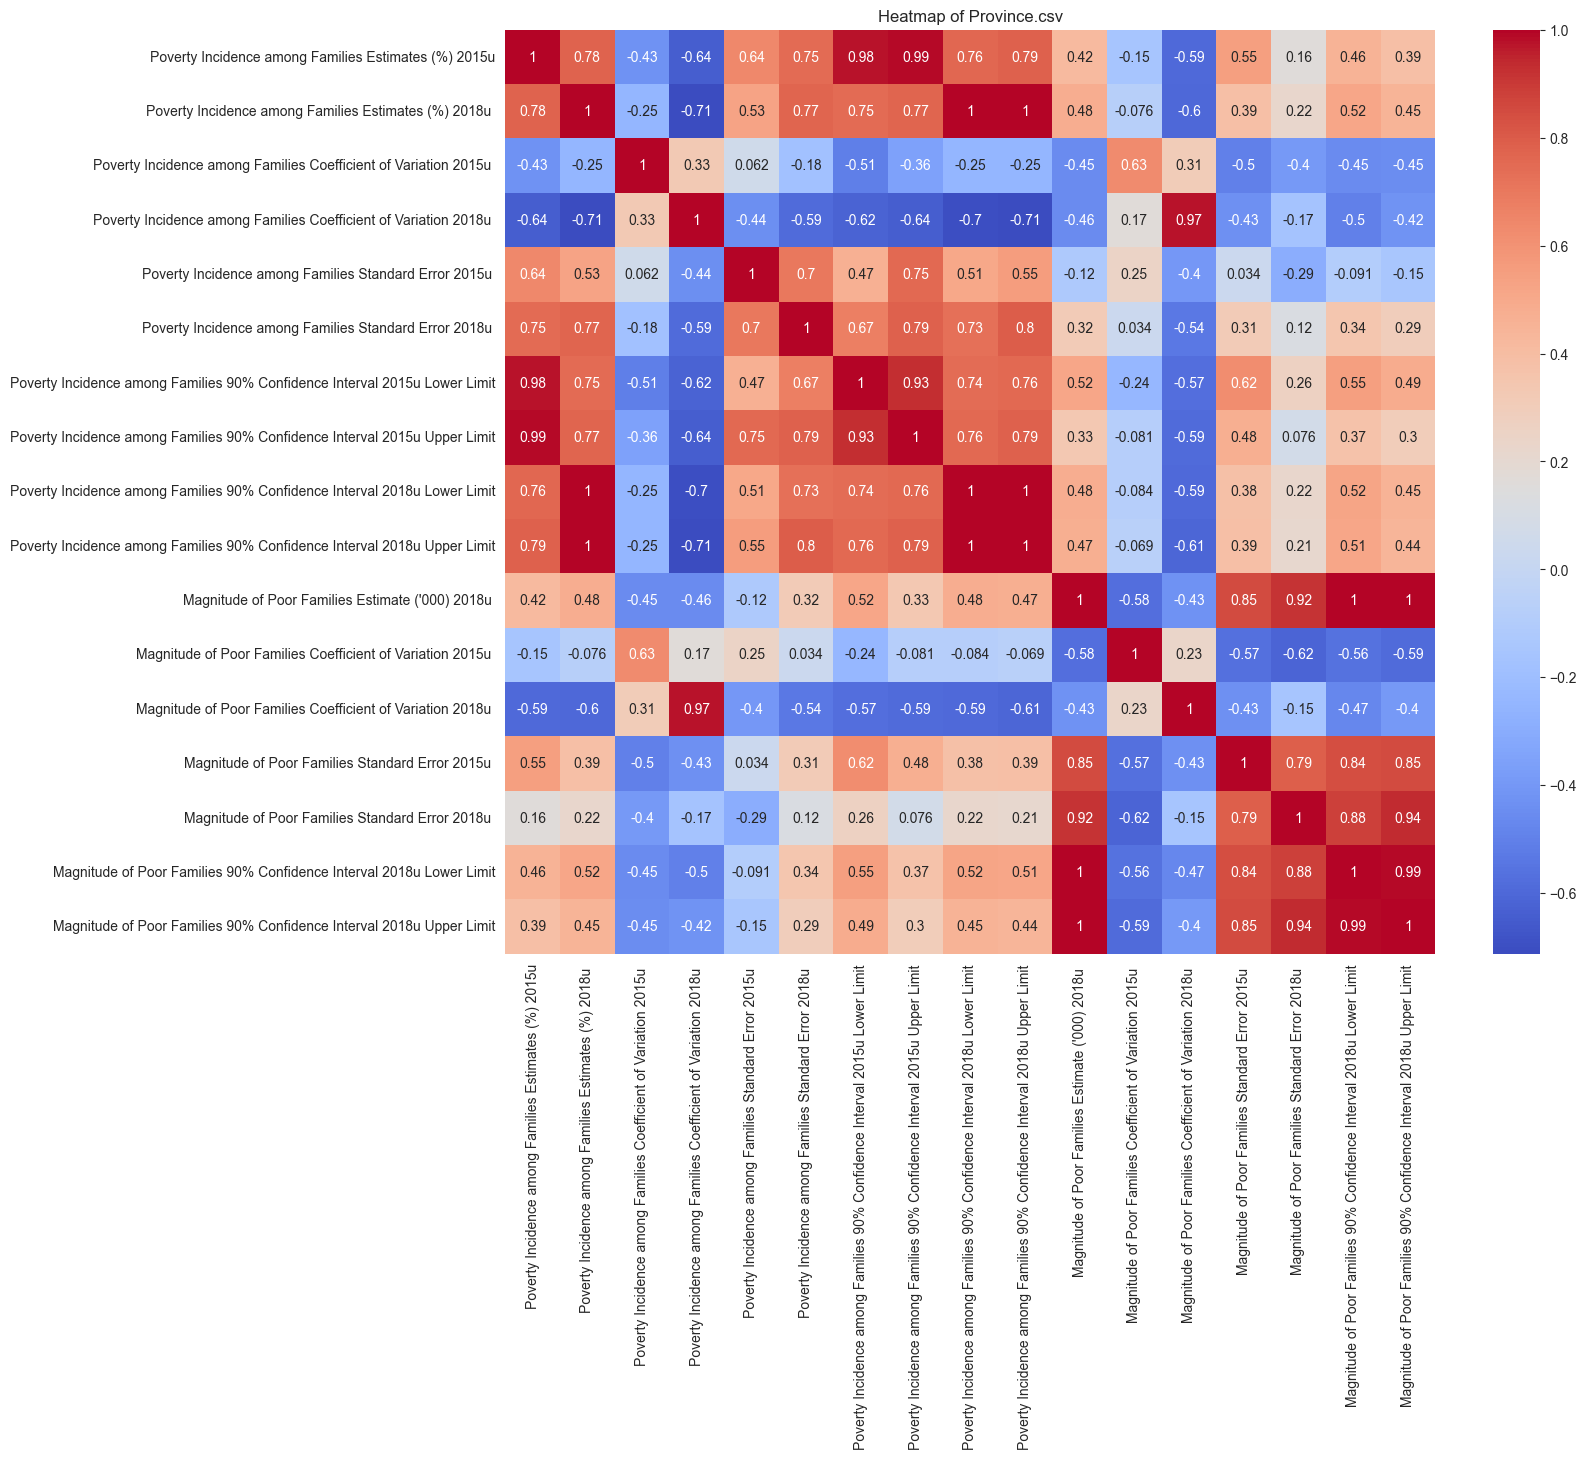

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Province.csv')

print(df.head())

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

if 'Region code' in df.columns:
    df = df.drop(columns=['Region code'])

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Province.csv')
plt.show()

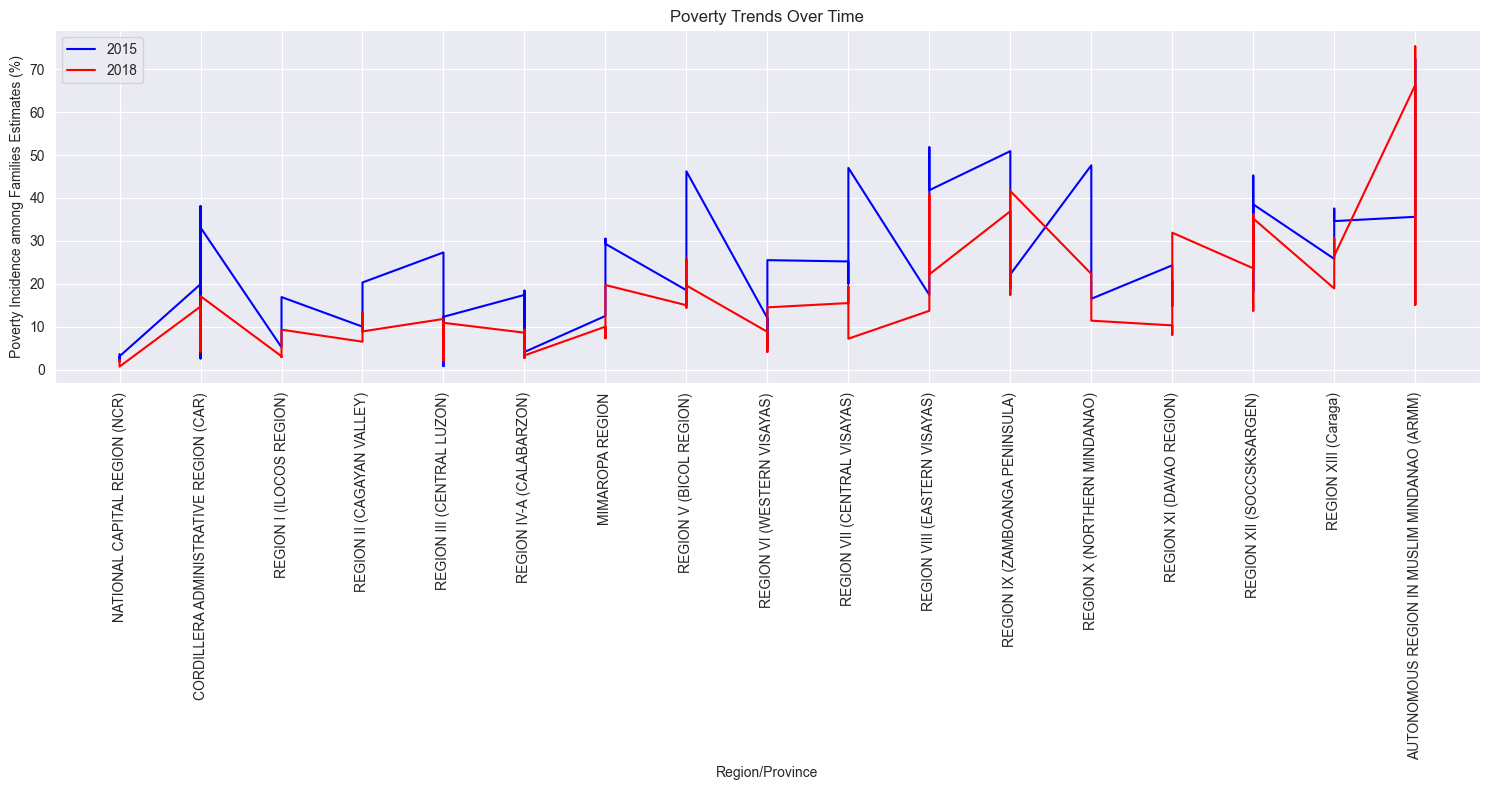

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Province.csv')

df.columns = df.columns.str.strip()

df['Region'] = df['Region'].str.replace(r'\*$', '', regex=True)

df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = df['Poverty Incidence among Families Estimates (%) 2015u'].astype(float)
df['Poverty Incidence among Families Estimates (%) 2018u'] = df['Poverty Incidence among Families Estimates (%) 2018u'].astype(float)

df_filtered = df[['Region', 'Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u']]

df_filtered.set_index('Region', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(df_filtered.index, df_filtered['Poverty Incidence among Families Estimates (%) 2015u'], label='2015', color='blue')
plt.plot(df_filtered.index, df_filtered['Poverty Incidence among Families Estimates (%) 2018u'], label='2018', color='red')
plt.xlabel('Region/Province')
plt.ylabel('Poverty Incidence among Families Estimates (%)')
plt.title('Poverty Trends Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [104]:
import pandas as pd

df = pd.read_csv('Province.csv')

df.columns = df.columns.str.strip()

df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = df['Poverty Incidence among Families Estimates (%) 2015u'].astype(float)
df['Poverty Incidence among Families Estimates (%) 2018u'] = df['Poverty Incidence among Families Estimates (%) 2018u'].astype(float)

df['Difference'] = df['Poverty Incidence among Families Estimates (%) 2015u'] - df['Poverty Incidence among Families Estimates (%) 2018u']

decreasing = df['Difference'].mean() > 0

print("Is the poverty incidence among families decreasing between 2015 and 2018?", decreasing)

Is the poverty incidence among families decreasing between 2015 and 2018? True


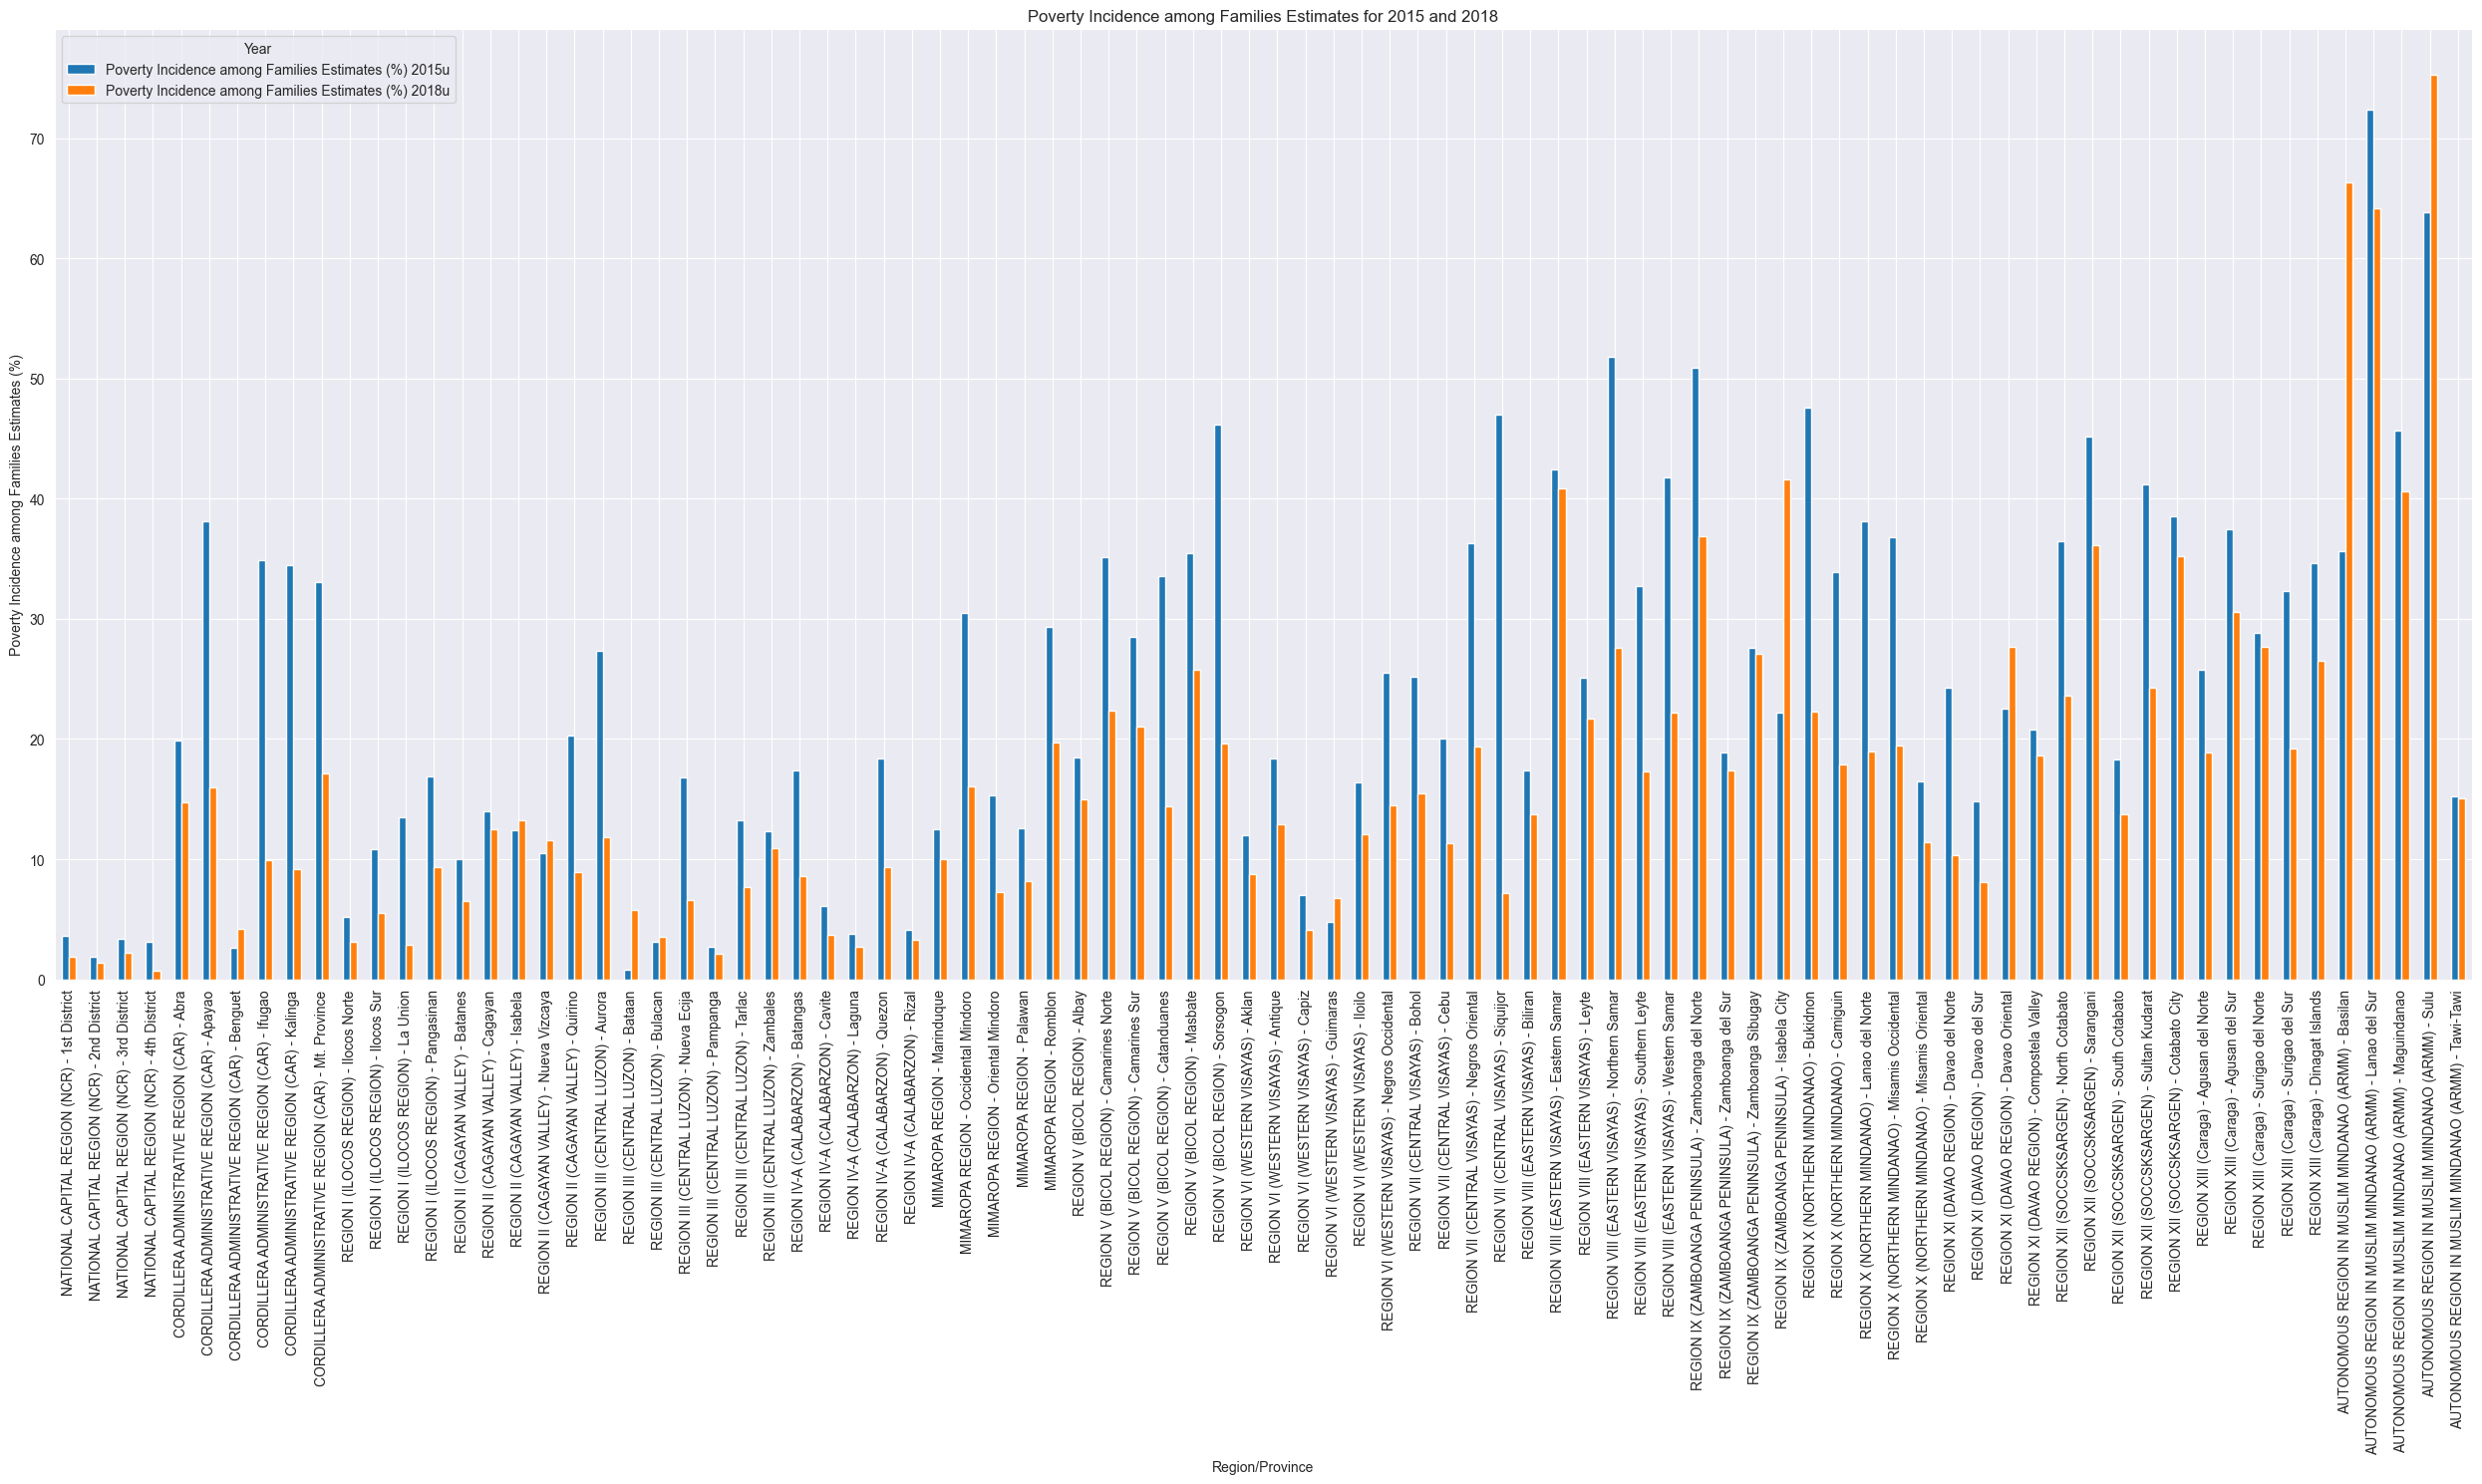

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Province.csv')

df.columns = df.columns.str.strip()

df['Region'] = df['Region'].str.replace(r'\*$', '', regex=True)

df['Province'] = df['Province'].astype(str)
df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2015u'], errors='coerce')
df['Poverty Incidence among Families Estimates (%) 2018u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2018u'], errors='coerce')

df.dropna(subset=['Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u'], inplace=True)

df['Region_Province'] = df['Region'] + ' - ' + df['Province']

df_filtered = df[['Region_Province', 'Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u']]

df_filtered.set_index('Region_Province', inplace=True)

df_filtered.plot(kind='bar', figsize=(25, 15))
plt.xlabel('Region/Province')
plt.ylabel('Poverty Incidence among Families Estimates (%)')
plt.title('Poverty Incidence among Families Estimates for 2015 and 2018')
plt.legend(title='Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

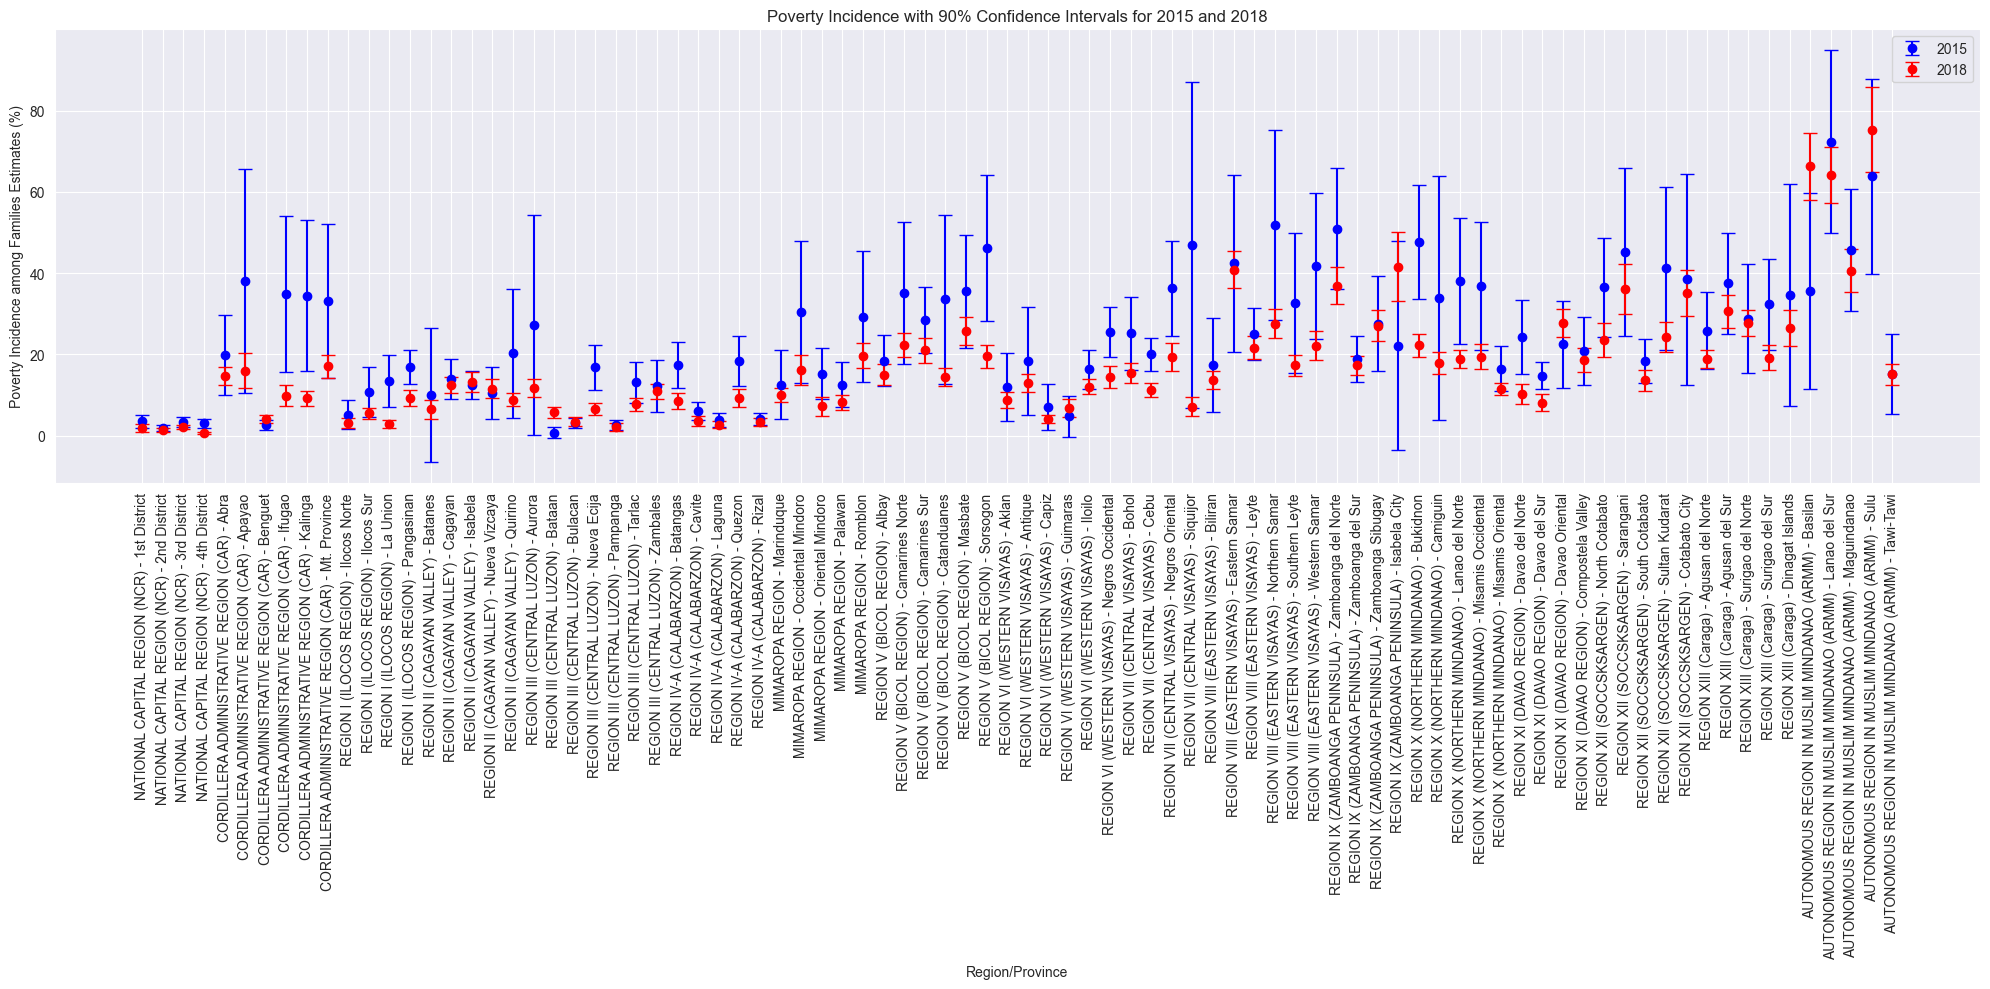

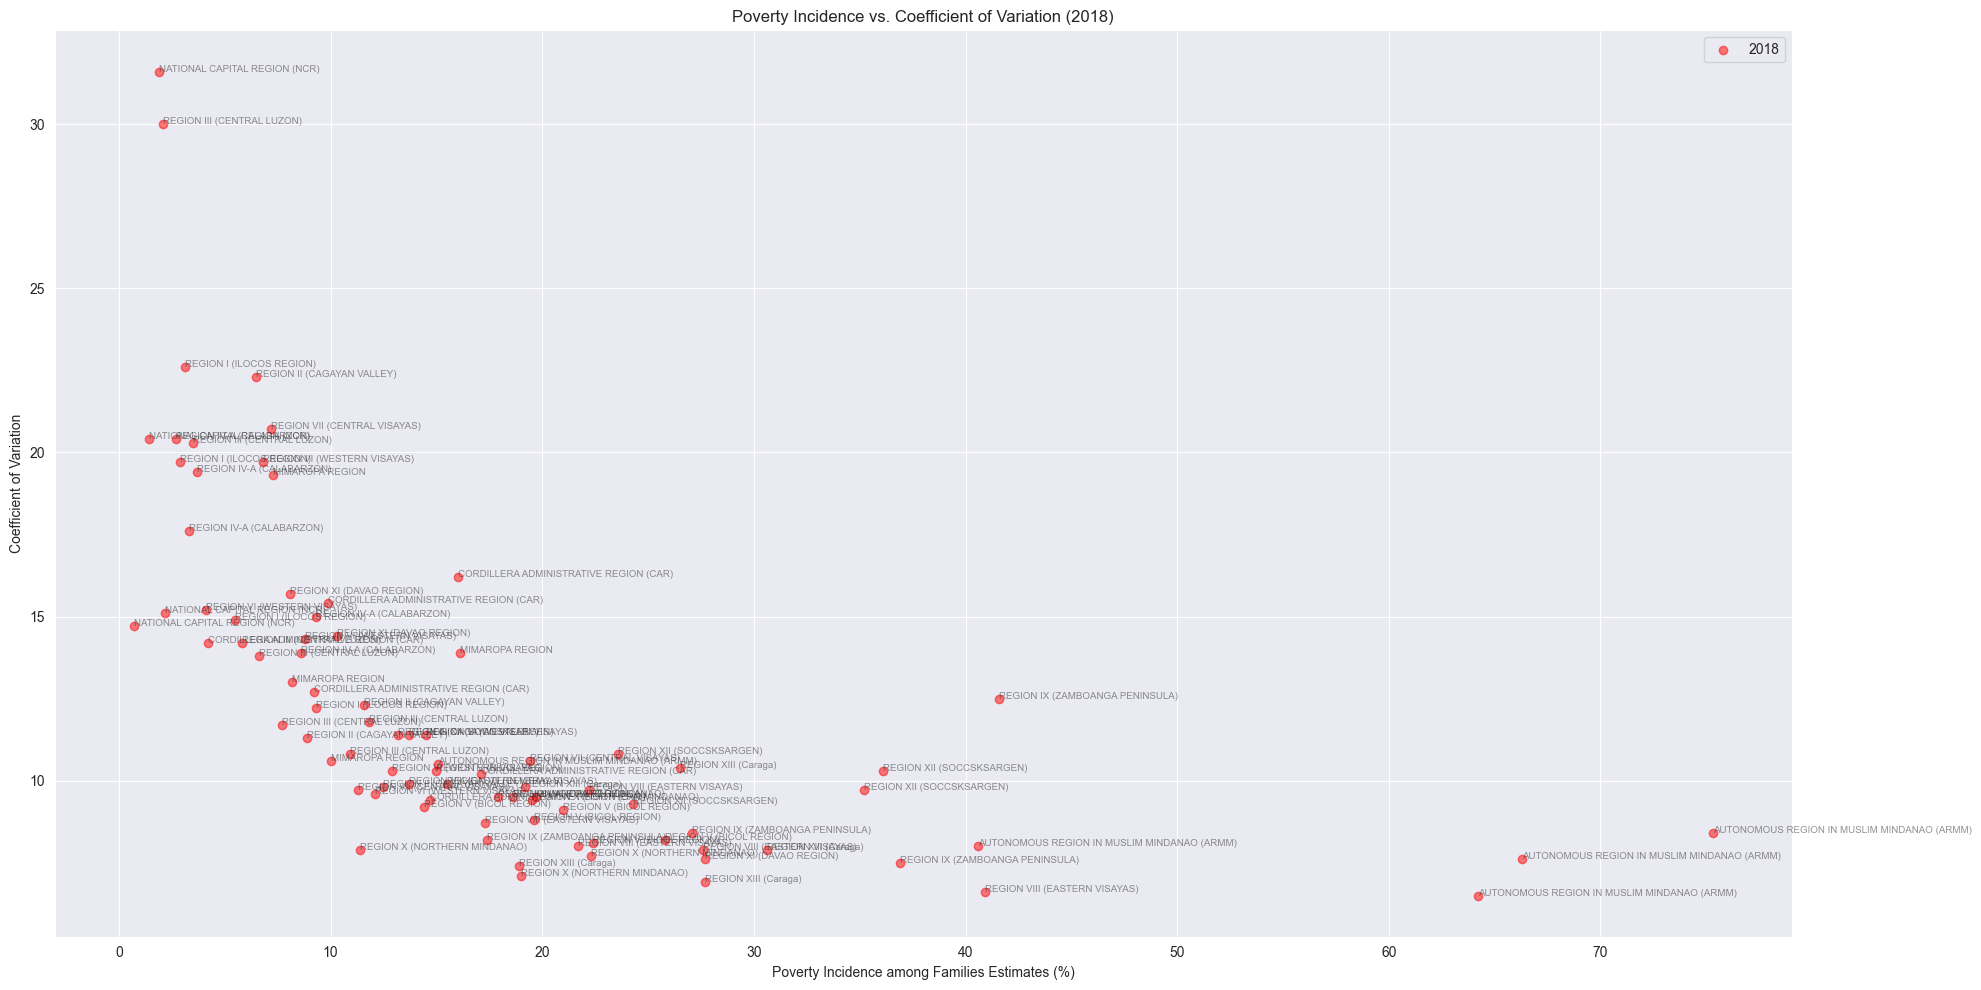

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Province.csv')

df.columns = df.columns.str.strip()

df['Province'] = df['Province'].str.replace(r'^(b/|c/|\*)', '', regex=True)

df['Province'] = df['Province'].str.replace(r'[^a-zA-Z\s]+$', '', regex=True)

df['Region'] = df['Region'].str.replace(r'\*$', '', regex=True)

df['Province'] = df['Province'].astype(str)
df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2015u'], errors='coerce')
df['Poverty Incidence among Families Estimates (%) 2018u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2018u'], errors='coerce')

if 'Magnitude of Poor Families Coefficient of Variation 2015u' in df.columns and 'Magnitude of Poor Families Coefficient of Variation 2018u' in df.columns:
    df['Coefficient of Variation 2015u'] = pd.to_numeric(df['Magnitude of Poor Families Coefficient of Variation 2015u'], errors='coerce')
    df['Coefficient of Variation 2018u'] = pd.to_numeric(df['Magnitude of Poor Families Coefficient of Variation 2018u'], errors='coerce')

    df.dropna(subset=['Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u', 'Coefficient of Variation 2015u', 'Coefficient of Variation 2018u'], inplace=True)

    confidence_level = 0.90
    z = 1.645
    df['CI 2015'] = z * (df['Poverty Incidence among Families Estimates (%) 2015u'] * df['Coefficient of Variation 2015u'] / 100)
    df['CI 2018'] = z * (df['Poverty Incidence among Families Estimates (%) 2018u'] * df['Coefficient of Variation 2018u'] / 100)

    plt.figure(figsize=(20, 10))
    plt.errorbar(df['Region'] + ' - ' + df['Province'], df['Poverty Incidence among Families Estimates (%) 2015u'], yerr=df['CI 2015'], fmt='o', label='2015', color='blue', capsize=5)
    plt.errorbar(df['Region'] + ' - ' + df['Province'], df['Poverty Incidence among Families Estimates (%) 2018u'], yerr=df['CI 2018'], fmt='o', label='2018', color='red', capsize=5)
    plt.xlabel('Region/Province')
    plt.ylabel('Poverty Incidence among Families Estimates (%)')
    plt.title('Poverty Incidence with 90% Confidence Intervals for 2015 and 2018')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 10))
    scatter = plt.scatter(df['Poverty Incidence among Families Estimates (%) 2018u'], df['Coefficient of Variation 2018u'], alpha=0.5, c='red', label='2018')
    for i, region in enumerate(df['Region']):
        plt.annotate(region, (df['Poverty Incidence among Families Estimates (%) 2018u'].iloc[i], df['Coefficient of Variation 2018u'].iloc[i]), fontsize=7, alpha=0.50)
    plt.xlabel('Poverty Incidence among Families Estimates (%)')
    plt.ylabel('Coefficient of Variation')
    plt.title('Poverty Incidence vs. Coefficient of Variation (2018)')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The required columns 'Magnitude of Poor Families Coefficient of Variation 2015u' and/or 'Magnitude of Poor Families Coefficient of Variation 2018u' do not exist in the DataFrame.")

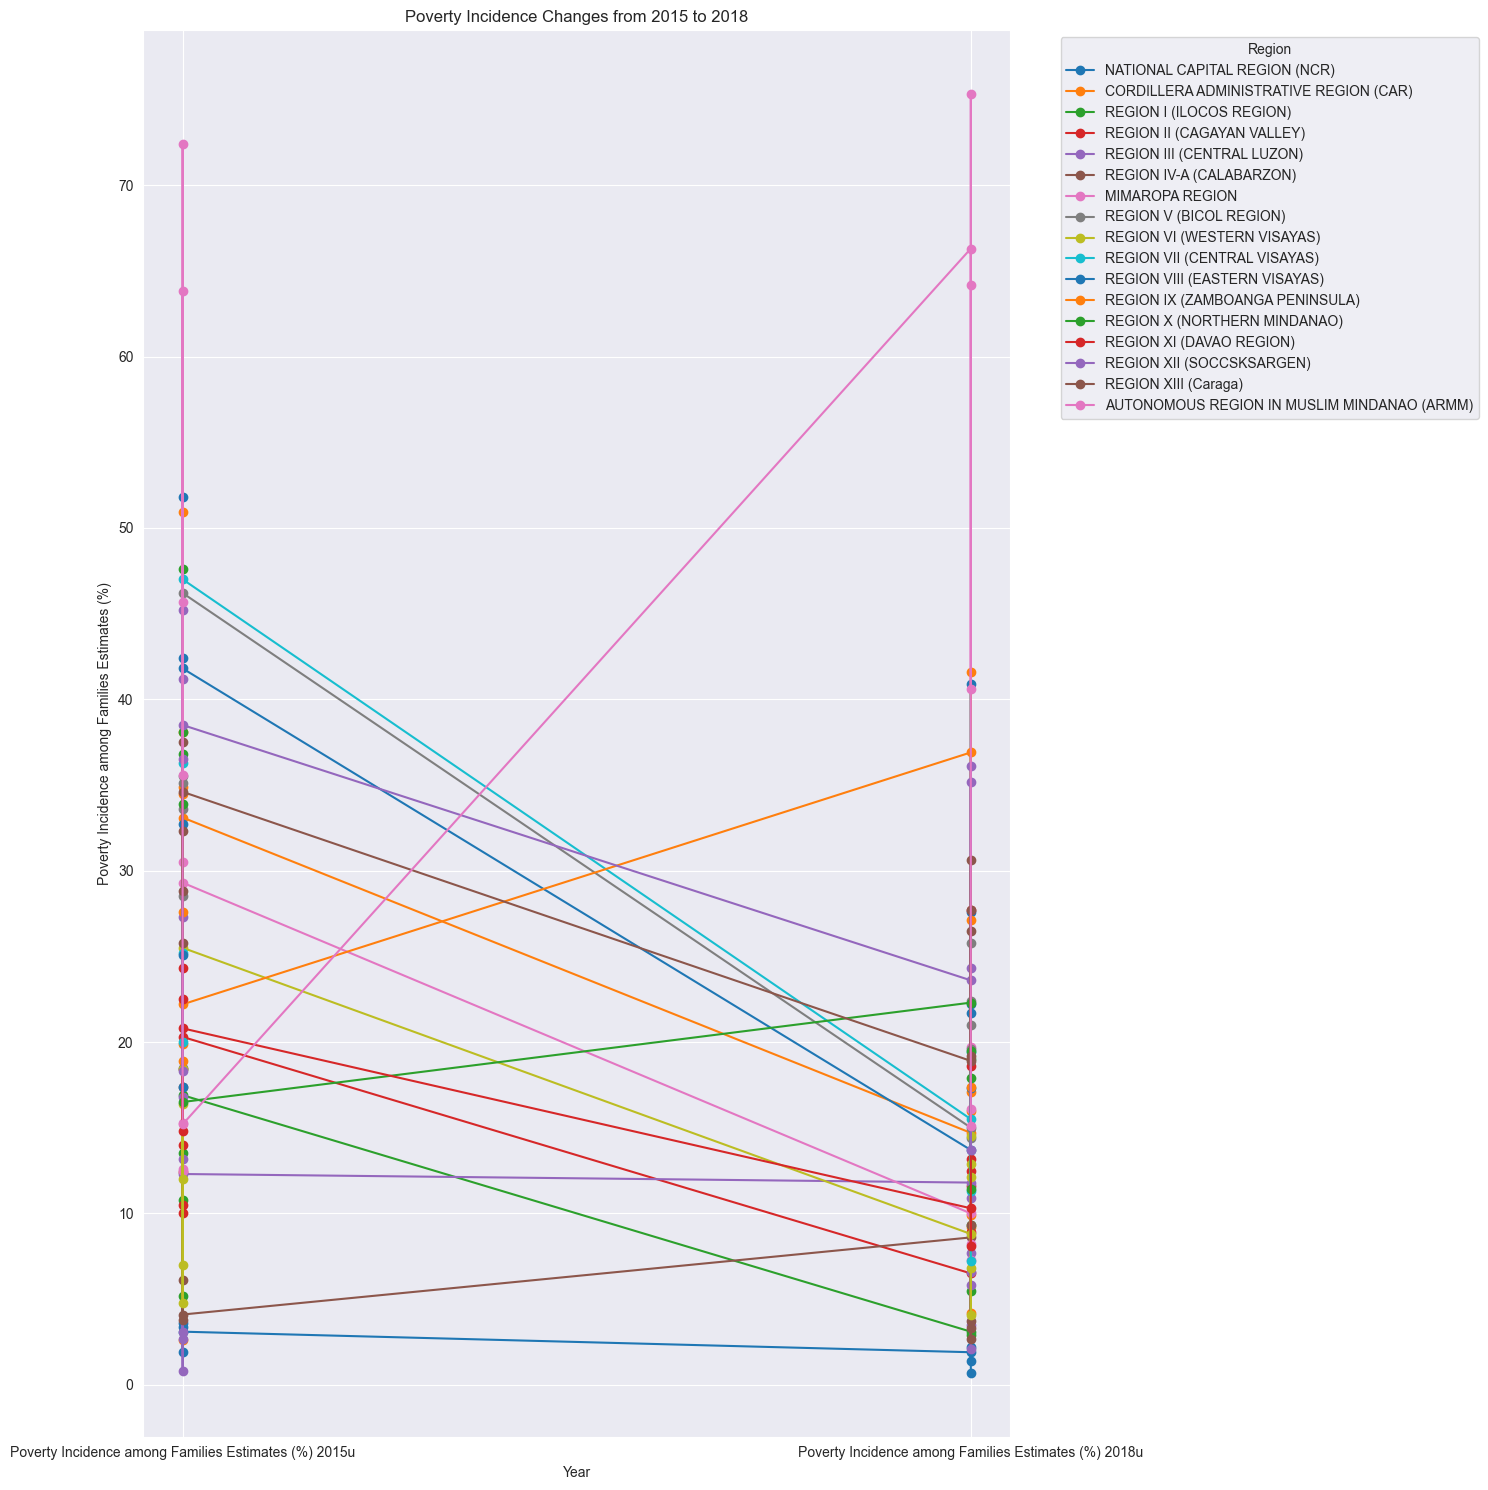

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Province.csv')

df.columns = df.columns.str.strip()

df['Region'] = df['Region'].str.replace(r'\*$', '', regex=True)

df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2015u'], errors='coerce')
df['Poverty Incidence among Families Estimates (%) 2018u'] = pd.to_numeric(df['Poverty Incidence among Families Estimates (%) 2018u'], errors='coerce')

df.dropna(subset=['Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u'], inplace=True)

df_slope = df[['Region', 'Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u']]
df_slope = df_slope.melt(id_vars='Region', var_name='Year', value_name='Poverty Incidence')

plt.figure(figsize=(15, 15))
for region in df_slope['Region'].unique():
    region_data = df_slope[df_slope['Region'] == region]
    plt.plot(region_data['Year'], region_data['Poverty Incidence'], marker='o', label=region)

plt.xlabel('Year')
plt.ylabel('Poverty Incidence among Families Estimates (%)')
plt.title('Poverty Incidence Changes from 2015 to 2018')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()